<a href="https://colab.research.google.com/github/MeryemBenz/montecarlosimulation/blob/main/montecarlosimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


💡 Probability savings last 30 years: 79.2%


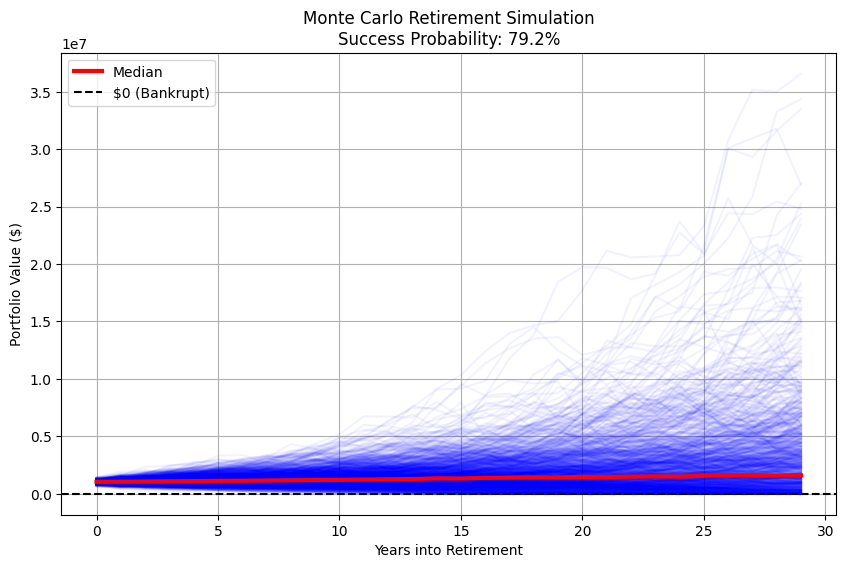

In [2]:
initial_portfolio = 1_000_000
annual_spending = 40_000
years_retirement = 30
n_simulations = 1000
mean_return = 0.07
std_dev = 0.15
inflation = 0.02


def retirement_monte_carlo():
    results = np.zeros((years_retirement, n_simulations))
    success_count = 0

    for i in range(n_simulations):
        portfolio = initial_portfolio
        for year in range(years_retirement):

            market_return = np.random.normal(mean_return, std_dev)
            portfolio *= (1 + market_return)


            spending = annual_spending * (1 + inflation) ** year
            portfolio -= spending


            results[year, i] = max(portfolio, 0)


        if portfolio > 0:
            success_count += 1

    success_prob = (success_count / n_simulations) * 100
    return results, success_prob


results, success_prob = retirement_monte_carlo()


print(f"\n💡 Probability savings last {years_retirement} years: {success_prob:.1f}%")


plt.figure(figsize=(10, 6))
plt.plot(results, color='blue', alpha=0.05)
plt.plot(np.median(results, axis=1), color='red', linewidth=3, label='Median')
plt.axhline(0, color='black', linestyle='--', label='$0 (Bankrupt)')
plt.title(f"Monte Carlo Retirement Simulation\nSuccess Probability: {success_prob:.1f}%")
plt.xlabel("Years into Retirement")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.show()